In [12]:
import numpy as np
import matplotlib.pyplot as plt

# PCA
Principle Component Analysis

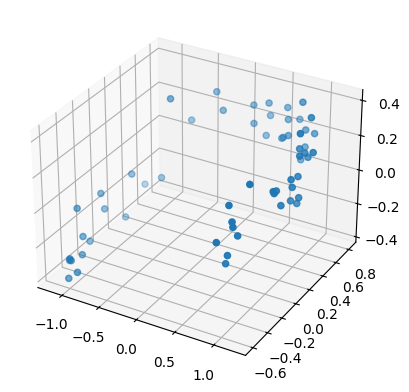

In [25]:
# 3D data
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

## Principle Components

In [37]:
X_centered = X - X.mean(axis=0)
# singular value decomposition
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

## Projecting Down to d Dimensions

In [50]:
# projecting to the first 2 principle component
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)